# Analisando o dataset "Heart Failure" retirado do site Kaggle
Link do dataset e descrição dos dados: https://www.kaggle.com/fedesoriano/heart-failure-prediction

Após ter realizado o processamento dos dados uma análise dos dados é feita neste notebook afim de encontrar um perfil.

### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell
from sklearn.feature_selection import chi2

In [2]:
df = pd.read_csv('heart-desease-clean.csv')

In [3]:
df.head()

,Age,Sex,Cholesterol,FastingBS,HeartDisease,age_cat,chol_level
0,40,1,289,0,0,Adulta,Alto
1,49,0,180,0,1,Adulta,Baixo
2,37,1,283,0,0,Adulta,Alto
3,48,0,214,0,1,Adulta,Baixo
4,54,1,195,0,0,Adulta,Baixo


Esse dataset é feito apenas de variáveis categóricas com próposito de encontra-se um perfil que relacione problemas cardiácos com colesterol.

In [4]:
df_dummy = pd.read_csv('heart-desease-dummy.csv')

In [5]:
df_dummy.head()

,HeartDisease,low-chol,high-chol,Adulta,Idosa,mulher,homem,sem-diabetes,diabetes
0,0,0,1,1,0,0,1,1,0
1,1,1,0,1,0,1,0,1,0
2,0,0,1,1,0,0,1,1,0
3,1,1,0,1,0,1,0,1,0
4,0,1,0,1,0,0,1,1,0


In [162]:
df.shape

(746, 7)

In [6]:
dfChol = df_dummy.copy()

C:\Users\tasso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


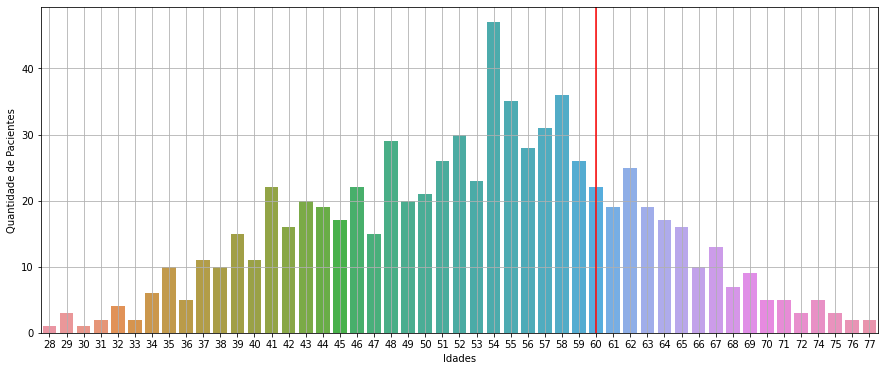

In [7]:
plt.figure(figsize=(15,6))
sns.countplot(df['Age'])
plt.grid(True, linestyle='-')
plt.xlabel('Idades')
plt.ylabel('Quantidade de Pacientes')
plt.axvline(x = 32, color = 'r', label = 'axvline - full height')
plt.show()

A figura acima mostra a distribuição da idade dos pacientes no dataset tendo a linha vermelha representando a divisão entre os adultos e idosos.

### Distribuição dos Dados

Nesta seção apresentamos a distribuição das variáveis no dataset.

In [8]:
chol_lvl = df_dummy['high-chol'].apply(lambda x: 'Alto' if (x==1) else 'Baixo')
diabetico = df_dummy['diabetes'].apply(lambda x: 'Diabético' if (x==1) else 'Não Diabético')
sexo = df_dummy['homem'].apply(lambda x: 'Homem' if (x==1) else 'Mulher')
idade = df_dummy['Adulta'].apply(lambda x: 'Adulto' if (x==1) else 'Idoso')
cardiaco = df_dummy['HeartDisease'].apply(lambda x: 'Cardiaco' if (x==1) else 'Normal')

C:\Users\tasso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tasso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tasso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tasso\anaconda3\lib\si

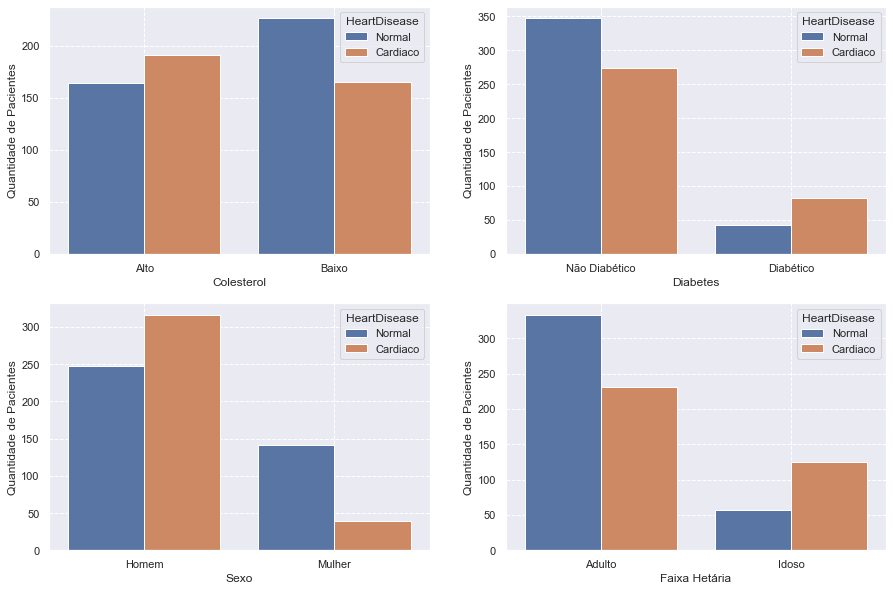

In [10]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(chol_lvl,hue = cardiaco)
plt.grid(True, linestyle='--')
plt.xlabel('Colesterol')
plt.ylabel('Quantidade de Pacientes')

plt.subplot(2,2,2)
sns.countplot(diabetico,hue = cardiaco)
plt.grid(True, linestyle='--')
plt.xlabel('Diabetes')
plt.ylabel('Quantidade de Pacientes')

plt.subplot(2,2,3)
sns.countplot(sexo,hue = cardiaco)
plt.grid(True, linestyle='--')
plt.xlabel('Sexo')
plt.ylabel('Quantidade de Pacientes')

plt.subplot(2,2,4)
sns.countplot(idade,hue = cardiaco)
plt.grid(True, linestyle='--')
plt.xlabel('Faixa Hetária')
plt.ylabel('Quantidade de Pacientes')

sns.set_theme(style="darkgrid")

plt.show()

C:\Users\tasso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


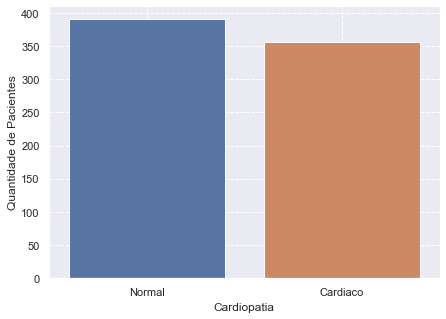

In [11]:
plt.figure(figsize=(7,5))

sns.countplot(cardiaco)
plt.grid(True, linestyle='--')
plt.xlabel('Cardiopatia')
plt.ylabel('Quantidade de Pacientes')

sns.set_theme(style="darkgrid")

plt.show()

### Teste Qui-Quadrado

Nesta seção utilizamos o teste qui-quadrado para verifica se existe uma dependência entre os perfis definidos apartir do dataset das variáveis dummy `df_dummy`.

In [168]:
def chi2_result(X,y):
    # Calculando Chi-Squared
    chi_scores = chi2(X,y)
    
    # Colocando label nos resultados para posterior plot
    scores = pd.Series(chi_scores[0], index=X.columns)
    pvalues = pd.Series(chi_scores[1], index=X.columns)
    
    # Resultados
    return pd.DataFrame({'Chi2':scores, 'p-Value':pvalues})

In [171]:
# Dividindo dataset
X = df_dummy.drop(['HeartDisease'], axis=1)
y = df_dummy.HeartDisease

In [172]:
chi2_result(X,y)

,Chi2,p-Value
low-chol,4.778417,2.881860e-02
high-chol,5.262989,2.178358e-02
Adulta,10.342250,1.300194e-03
Idosa,30.494645,3.347893e-08
mulher,48.345724,3.573225e-12
homem,15.600925,7.821631e-05
sem-diabetes,3.223808,7.257461e-02
diabetes,16.015879,6.281344e-05


In [173]:
perfis = pd.DataFrame()

In [174]:
# Homens
perfis['Perfil_M'] = np.where(homem & high_chol, 1, 0)
perfis['Perfil_MA'] = np.where(homem & adulta & high_chol, 1, 0)
perfis['Perfil_MI'] = np.where(homem & idosa & high_chol, 1, 0)
perfis['Perfil_MAD'] = np.where(homem & adulta & diabetes & high_chol, 1, 0)
perfis['Perfil_MID'] = np.where(homem & idosa & diabetes & high_chol, 1, 0)
perfis['Perfil_MAN'] = np.where(homem & adulta & n_diabetes & high_chol, 1, 0)
perfis['Perfil_MIN'] = np.where(homem & idosa & n_diabetes & high_chol, 1, 0)

In [175]:
# Mulher
perfis['Perfil_F'] = np.where(mulher & high_chol, 1, 0)
perfis['Perfil_FA'] = np.where(mulher & adulta & high_chol, 1, 0)
perfis['Perfil_FI'] = np.where(mulher & idosa & high_chol, 1, 0)
perfis['Perfil_FAD'] = np.where(mulher & adulta & diabetes & high_chol, 1, 0)
perfis['Perfil_FID'] = np.where(mulher & idosa & diabetes & high_chol, 1, 0)
perfis['Perfil_FAN'] = np.where(mulher & adulta & n_diabetes & high_chol, 1, 0)
perfis['Perfil_FIN'] = np.where(mulher & idosa & n_diabetes & high_chol, 1, 0)

In [176]:
perfis['Perfil_A'] = np.where(adulta & high_chol, 1, 0)
perfis['Perfil_I'] = np.where(idosa & high_chol, 1, 0)
perfis['Perfil_D'] = np.where(diabetes & high_chol, 1, 0)
perfis['Perfil_N'] = np.where(n_diabetes & high_chol, 1, 0)

In [177]:
perfis.head()

,Perfil_M,Perfil_MA,Perfil_MI,Perfil_MAD,Perfil_MID,Perfil_MAN,Perfil_MIN,Perfil_F,Perfil_FA,Perfil_FI,Perfil_FAD,Perfil_FID,Perfil_FAN,Perfil_FIN,Perfil_A,Perfil_I,Perfil_D,Perfil_N
0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [178]:
X = perfis
y = df.HeartDisease

In [67]:
perfis['perfil-had'].value_counts()

0    719
1     27
Name: perfil-had, dtype: int64

In [179]:
chi2_result(X,y)

,Chi2,p-Value
Perfil_M,21.011344,4.565720e-06
Perfil_MA,3.324358,6.826065e-02
Perfil_MI,32.690467,1.080659e-08
Perfil_MAD,7.515943,6.115527e-03
Perfil_MID,13.276442,2.687620e-04
Perfil_MAN,0.634755,4.256165e-01
Perfil_MIN,19.949920,7.949727e-06
Perfil_F,11.652771,6.410697e-04
Perfil_FA,13.909715,1.918045e-04
Perfil_FI,0.165966,6.837217e-01


In [182]:
final = chi2_result(X,y).sort_values('Chi2', ascending=False)

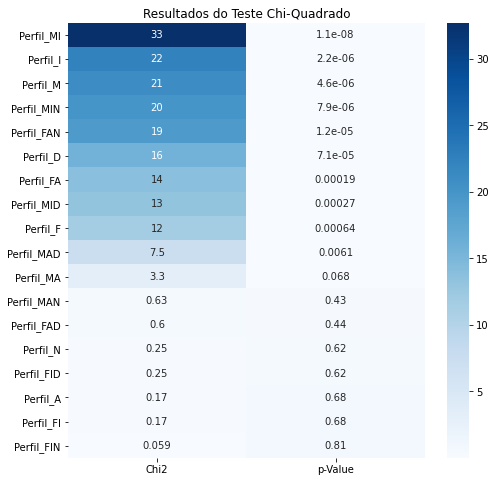

In [183]:
# Mapa de calor com os resultados do chi-quadrado
fig = plt.figure(figsize=(8,8))
sns.heatmap(final, annot=True, cmap='Blues')
plt.title('Resultados do Teste Chi-Quadrado')
plt.show()

In [195]:
hom_ido = (df['Sex'] == 1) & (df['age_cat'] == 'Idosa')
hom_ido_col = (df['Sex'] == 1) & (df['age_cat'] == 'Idosa') & (df['chol_level'] == 'Alto')

In [203]:
porcentagem = len(df[hom_ido_col])/len(df[hom_ido])
print("Porcentagem de homem idosos com colesterol alto, em relação aos homens idosos: {:.2f}%".format(100*porcentagem))

Porcentagem de homem idosos com colesterol alto, em relação aos homens idosos: 52.63%


In [202]:
print(f"quantidade de homens idosos com colesterol alto: {hom_ido_col.value_counts()[1]}")

quantidade de homens idosos com colesterol alto: 70
